In [1]:
from shapely.geometry import Point, Polygon, LineString, MultiLineString,MultiPoint,MultiPolygon

In [21]:
from shapely.ops import nearest_points

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import math

import pandas as pd
import os
import rasterio
import contextily as ctx

In [4]:
coast_1926=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1926.geojson")
coast_1942=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1942.geojson")

In [30]:
coast_1941=gpd.read_file("../assets/f_1941_coastline.geojson")

In [35]:
coast_1953=gpd.read_file("../assets/f_1953_coastline_bay.geojson")
coast_1954=gpd.read_file("../assets/f_1954_coastline.geojson")

In [9]:
coast_1942

,id,YEAR,MONTH,DAY,PHOTO_,Shape_Leng,geometry
0,0,1942,7,0,gra_md,899.055501,"LINESTRING (-124.14352 46.90580, -124.13174 46..."
1,1,1942,7,0,gra_md,2703.027041,"LINESTRING (-124.16218 46.90646, -124.16522 46..."
2,2,1942,7,0,gra_md,1401.059107,"LINESTRING (-124.16178 46.90614, -124.15910 46..."
3,3,1942,7,0,gra_md,1201.276320,"LINESTRING (-124.13082 46.89460, -124.13159 46..."
4,4,1942,7,0,gra_md,602.662308,"LINESTRING (-124.14342 46.90544, -124.13552 46..."
...,...,...,...,...,...,...,...
135,135,1942,8,0,USGS,7022.435033,"LINESTRING (-123.93549 46.08069, -123.93487 46..."
136,136,1942,8,0,USGS,493.174313,"LINESTRING (-123.92304 46.01168, -123.92332 46..."
137,137,1942,8,0,USGS,277.085147,"LINESTRING (-123.92603 46.01194, -123.92625 46..."
138,138,1942,8,0,USGS,201.420617,"LINESTRING (-123.93574 46.08249, -123.93550 46..."


In [10]:
#function to clip the gdf
def clip(polygon_list,gdf_for_clipping):
    polygon=Polygon(polygon_list)
    gdf_after_clipping = gdf_for_clipping.clip(polygon)
    #poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf_1911.crs)
    return gdf_after_clipping

In [11]:
#I only need South Beach area, clip the gdf
polygon_list_westport=[(-124.175972,46.918562),(-123.913222,46.918562),(-123.913222,46.69),(-124.175972,46.69)]

In [13]:
#remove not needed area
coast_1926=clip(polygon_list_westport,coast_1926)
coast_1942=clip(polygon_list_westport,coast_1942)

/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [37]:
#function to plot the shoreline

def line_show(gdf):
    gdf = gdf.to_crs(epsg=3857)

    # assuming gdf1 and gdf2 are your GeoDataFrames
    fig, ax = plt.subplots(figsize = (10,10))

    coast_1926_3857 = coast_1926.to_crs(epsg=3857)

    # plot the base map of 1911
    base = coast_1926_3857.plot(ax=ax, color='white', edgecolor='black')

    # plot the first GeoDataFrame

    gdf.plot(ax=base, marker='o', color='black', markersize=5)

    ctx.add_basemap(ax,zoom=11,source=ctx.providers.CartoDB.Positron)

    # Show the plot
    plt.show()

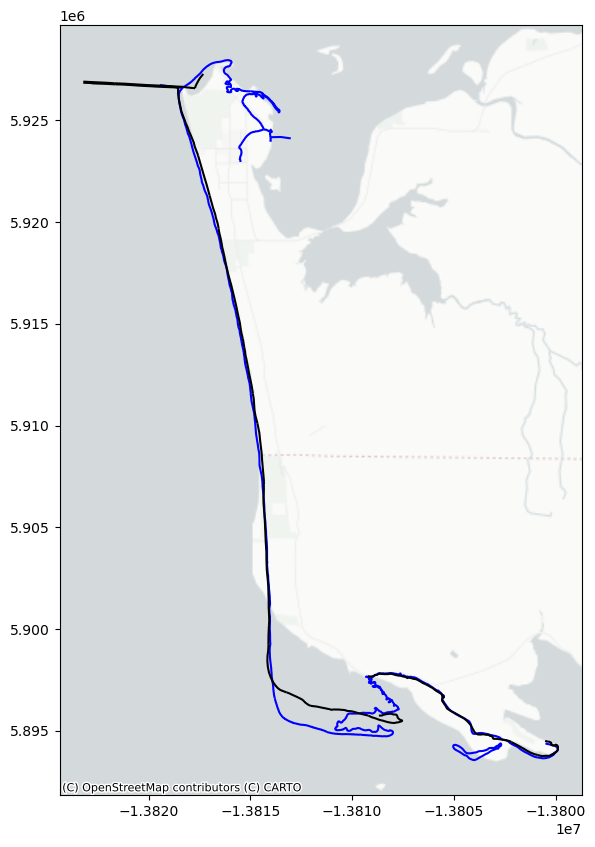

In [17]:
line_show(coast_1942)

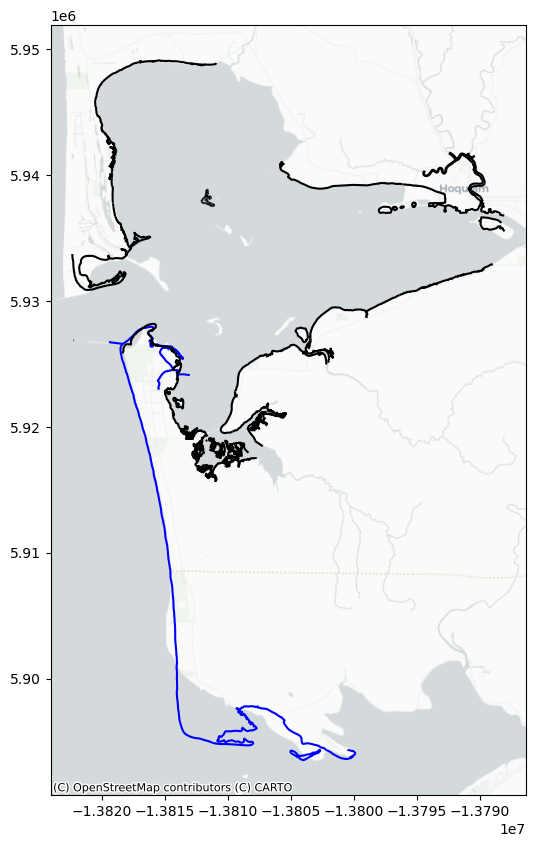

In [31]:
line_show(coast_1941)

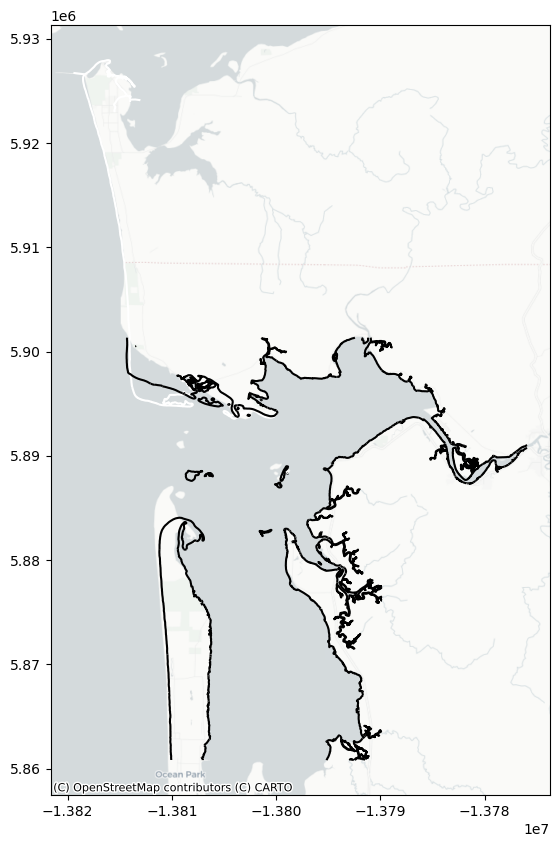

In [38]:
line_show(coast_1953)

In [18]:
coast_1942

,id,YEAR,MONTH,DAY,PHOTO_,Shape_Leng,geometry
19,19,1942,7,0,grymod,987.281714,"LINESTRING (-123.98693 46.70736, -123.98614 46..."
20,20,1942,7,0,grymod,1425.837616,"LINESTRING (-123.97538 46.70347, -123.97455 46..."
14,14,1942,7,0,grymod,2728.410862,"LINESTRING (-123.98693 46.70736, -123.98758 46..."
13,13,1942,7,0,grymod,2101.873636,"LINESTRING (-124.04548 46.71541, -124.04492 46..."
15,15,1942,7,0,grymod,1198.403558,"LINESTRING (-124.02478 46.72485, -124.02407 46..."
18,18,1942,7,0,grymod,800.771773,"LINESTRING (-124.03441 46.72718, -124.03388 46..."
17,17,1942,7,0,grymod,274.454825,"LINESTRING (-124.03782 46.72765, -124.03711 46..."
16,16,1942,7,0,grymod,985.235876,"LINESTRING (-124.05035 46.72732, -124.04958 46..."
12,12,1942,7,0,grymod,1975.618632,"LINESTRING (-124.07548 46.71834, -124.07463 46..."
10,10,1942,7,0,grymod,944.477713,"LINESTRING (-124.08619 46.72241, -124.08528 46..."


In [32]:
coast_1941

,FEATURE_ID,FEATURE,SOURCE_ID,DATA_SOURC,SRC_DATE,HOR_ACC,INFORM,RESOLUTION,ATTRIBUTE,CLASS,F_CODE,EX_METH,EXTRACT_TE,geometry
0,1368502.0,26.0,T06805A,A,19390101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A,"MULTILINESTRING ((-124.16730 46.90681, -124.16..."
1,1368504.0,26.0,T06805A,A,19390101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A,"MULTILINESTRING ((-124.12905 46.90492, -124.12..."
2,1368505.0,26.0,T06805A,A,19390101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A,"MULTILINESTRING ((-124.13235 46.90039, -124.13..."
3,1368506.0,28.0,T06805A,A,19390101,0,None,0.0,Shoreline/Alongshore Feature Boundary,SHORELINE,None,S,A,"MULTILINESTRING ((-124.12996 46.90488, -124.12..."
4,1368507.0,26.0,T06805A,A,19390101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A,"MULTILINESTRING ((-124.15438 46.93381, -124.15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,1369108.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.13759 46.99697, -124.13..."
384,1369109.0,26.0,T06812A,A,19400101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A,"MULTILINESTRING ((-124.13823 46.99681, -124.13..."
385,1369111.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.13694 46.99920, -124.13..."
386,1369579.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.14256 47.00552, -124.14..."


In [33]:
combined_1942=pd.concat([coast_1942,coast_1941],ignore_index=True)
combined_1942

,id,YEAR,MONTH,DAY,PHOTO_,Shape_Leng,geometry,FEATURE_ID,FEATURE,SOURCE_ID,DATA_SOURC,SRC_DATE,HOR_ACC,INFORM,RESOLUTION,ATTRIBUTE,CLASS,F_CODE,EX_METH,EXTRACT_TE
0,19,1942.0,7.0,0.0,grymod,987.281714,"LINESTRING (-123.98693 46.70736, -123.98614 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,1942.0,7.0,0.0,grymod,1425.837616,"LINESTRING (-123.97538 46.70347, -123.97455 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,1942.0,7.0,0.0,grymod,2728.410862,"LINESTRING (-123.98693 46.70736, -123.98758 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,1942.0,7.0,0.0,grymod,2101.873636,"LINESTRING (-124.04548 46.71541, -124.04492 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,1942.0,7.0,0.0,grymod,1198.403558,"LINESTRING (-124.02478 46.72485, -124.02407 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.13759 46.99697, -124.13...",1369108.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A
420,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.13823 46.99681, -124.13...",1369109.0,26.0,T06812A,A,19400101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A
421,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.13694 46.99920, -124.13...",1369111.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A
422,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.14256 47.00552, -124.14...",1369579.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A


/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


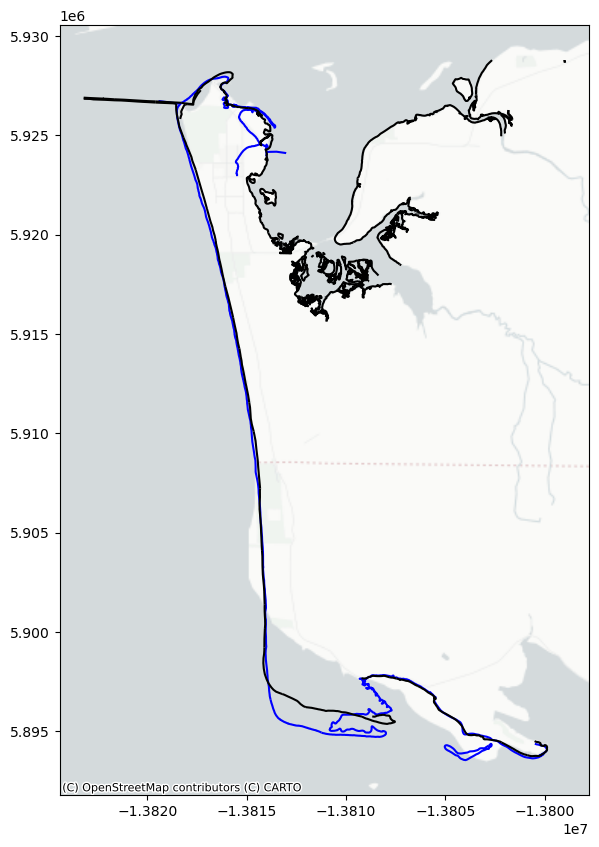

In [34]:
coast_1942=clip(polygon_list_westport,combined_1942)
line_show(coast_1942)

In [20]:
#get the list of each point in 1942 coastline
point_list=[]
for geometry in coast_1942['geometry']:
    if isinstance(geometry, MultiLineString):
        for line in geometry.geoms:
            for point in line.coords:
                point_list.append(Point(point))
                
    else:
        for point in geometry.coords:
            point_list.append(Point(point))

point_list
        

[<POINT (-123.987 46.707)>,
 <POINT (-123.986 46.707)>,
 <POINT (-123.985 46.707)>,
 <POINT (-123.984 46.706)>,
 <POINT (-123.983 46.706)>,
 <POINT (-123.983 46.706)>,
 <POINT (-123.981 46.705)>,
 <POINT (-123.981 46.705)>,
 <POINT (-123.979 46.705)>,
 <POINT (-123.979 46.704)>,
 <POINT (-123.978 46.704)>,
 <POINT (-123.977 46.704)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.974 46.703)>,
 <POINT (-123.973 46.703)>,
 <POINT (-123.972 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.969 46.704)>,
 <POINT (-123.968 46.704)>,
 <POINT (-123.967 46.704)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.966 46.705)>,
 <POINT (-123.966 46.705)>,
 <POINT (-123.966 46.706)>,
 <POINT (-123.966 46.706)>,
 <POINT (-123.966 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.707)>,
 <POINT (-123.968 46.7

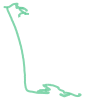

In [22]:
# Extract all the lines from the geometry column
all_lines_1926 = []
for geom in coast_1926['geometry']:
    if isinstance(geom, MultiLineString):
        all_lines_1926.extend(list(geom))
    else:  # If it's a LineString
        all_lines_1926.append(geom)

# Combine all lines into a single MultiLineString
combined_multiline = MultiLineString(all_lines_1926)

combined_multiline


In [23]:
#get the closet point in 1926 coastline to each point on 1942 coastline

closest_point_list=[]
for point in point_list:
    closest_point=nearest_points(point, combined_multiline)[1]
    closest_point_list.append(closest_point)



In [25]:
len(closest_point_list)

457

In [26]:
len(point_list)

457

In [27]:
closest_point_list

[<POINT (-123.987 46.707)>,
 <POINT (-123.986 46.707)>,
 <POINT (-123.986 46.706)>,
 <POINT (-123.985 46.706)>,
 <POINT (-123.984 46.706)>,
 <POINT (-123.983 46.705)>,
 <POINT (-123.982 46.705)>,
 <POINT (-123.981 46.704)>,
 <POINT (-123.98 46.704)>,
 <POINT (-123.979 46.704)>,
 <POINT (-123.978 46.703)>,
 <POINT (-123.977 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.974 46.703)>,
 <POINT (-123.973 46.702)>,
 <POINT (-123.972 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.969 46.704)>,
 <POINT (-123.968 46.704)>,
 <POINT (-123.967 46.704)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.968 46.706)>,
 <POINT (-123.968 46.70

In [29]:
#zip the point list and closest point list together
lines = [LineString([point_list[i], closest_point_list[i]]) for i in range(len(point_list))]
lines

[<LINESTRING (-123.987 46.707, -123.987 46.707)>,
 <LINESTRING (-123.986 46.707, -123.986 46.707)>,
 <LINESTRING (-123.985 46.707, -123.986 46.706)>,
 <LINESTRING (-123.984 46.706, -123.985 46.706)>,
 <LINESTRING (-123.983 46.706, -123.984 46.706)>,
 <LINESTRING (-123.983 46.706, -123.983 46.705)>,
 <LINESTRING (-123.981 46.705, -123.982 46.705)>,
 <LINESTRING (-123.981 46.705, -123.981 46.704)>,
 <LINESTRING (-123.979 46.705, -123.98 46.704)>,
 <LINESTRING (-123.979 46.704, -123.979 46.704)>,
 <LINESTRING (-123.978 46.704, -123.978 46.703)>,
 <LINESTRING (-123.977 46.704, -123.977 46.703)>,
 <LINESTRING (-123.975 46.703, -123.975 46.703)>,
 <LINESTRING (-123.975 46.703, -123.975 46.703)>,
 <LINESTRING (-123.975 46.703, -123.975 46.703)>,
 <LINESTRING (-123.974 46.703, -123.974 46.703)>,
 <LINESTRING (-123.973 46.703, -123.973 46.702)>,
 <LINESTRING (-123.972 46.703, -123.972 46.703)>,
 <LINESTRING (-123.971 46.703, -123.971 46.703)>,
 <LINESTRING (-123.971 46.703, -123.971 46.703)>,
 